# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [15]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint
from scipy.stats import linregress
import scipy.stats as st

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 609


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&units={units}&q={city}"
    #city = url + "&q=" + cities
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port-aux-francais
Processing Record 2 of Set 1 | apatzingan
Processing Record 3 of Set 1 | queenstown
Processing Record 4 of Set 1 | bethel
Processing Record 5 of Set 1 | badger
Processing Record 6 of Set 1 | ushuaia
Processing Record 7 of Set 1 | whitehorse
Processing Record 8 of Set 1 | igarka
Processing Record 9 of Set 1 | vilyuchinsk
Processing Record 10 of Set 1 | broome
Processing Record 11 of Set 1 | waitangi
Processing Record 12 of Set 1 | utrik
Processing Record 13 of Set 1 | fale old settlement
Processing Record 14 of Set 1 | blackmans bay
Processing Record 15 of Set 1 | bredasdorp
Processing Record 16 of Set 1 | san sebastian de la gomera
Processing Record 17 of Set 1 | port lincoln
Processing Record 18 of Set 1 | talnakh
Processing Record 19 of Set 1 | albany
Processing Record 20 of Set 1 | remire-montjoly
Processing Record 21 of Set 1 | ocean pointe
City not found. Skipping...
Proces

Processing Record 39 of Set 4 | spring creek
Processing Record 40 of Set 4 | kawthoung
City not found. Skipping...
Processing Record 41 of Set 4 | guaraniacu
Processing Record 42 of Set 4 | kargopol'
Processing Record 43 of Set 4 | molchanovo
Processing Record 44 of Set 4 | nema
Processing Record 45 of Set 4 | iqaluit
Processing Record 46 of Set 4 | ketchikan
Processing Record 47 of Set 4 | nabire
Processing Record 48 of Set 4 | nemuro
Processing Record 49 of Set 4 | dom pedro
Processing Record 0 of Set 5 | sonsorol village
City not found. Skipping...
Processing Record 1 of Set 5 | puerto san carlos
City not found. Skipping...
Processing Record 2 of Set 5 | saint-joseph
Processing Record 3 of Set 5 | ain el bya
Processing Record 4 of Set 5 | coxim
Processing Record 5 of Set 5 | ouellah
City not found. Skipping...
Processing Record 6 of Set 5 | kumbo
Processing Record 7 of Set 5 | waterloo
Processing Record 8 of Set 5 | east london
Processing Record 9 of Set 5 | bengkulu
Processing Reco

Processing Record 28 of Set 8 | siwa oasis
Processing Record 29 of Set 8 | island harbour
Processing Record 30 of Set 8 | vingt cinq
City not found. Skipping...
Processing Record 31 of Set 8 | port blair
Processing Record 32 of Set 8 | yarmouth
Processing Record 33 of Set 8 | copiapo
Processing Record 34 of Set 8 | bonthe
Processing Record 35 of Set 8 | tazovsky
Processing Record 36 of Set 8 | east ballina
Processing Record 37 of Set 8 | chibougamau
Processing Record 38 of Set 8 | vila franca do campo
Processing Record 39 of Set 8 | sinabang
Processing Record 40 of Set 8 | port antonio
Processing Record 41 of Set 8 | yanqul
Processing Record 42 of Set 8 | saint-philippe
Processing Record 43 of Set 8 | dhuusamarreeb
Processing Record 44 of Set 8 | fort-shevchenko
Processing Record 45 of Set 8 | saipan
Processing Record 46 of Set 8 | bethanie
Processing Record 47 of Set 8 | paita
Processing Record 48 of Set 8 | lompoc
Processing Record 49 of Set 8 | tranovaho
City not found. Skipping...


Processing Record 16 of Set 12 | sarai akil
Processing Record 17 of Set 12 | kalyandurg
Processing Record 18 of Set 12 | tralee
Processing Record 19 of Set 12 | puerto leguizamo
Processing Record 20 of Set 12 | banda aceh
Processing Record 21 of Set 12 | el suchil
City not found. Skipping...
Processing Record 22 of Set 12 | dolores
Processing Record 23 of Set 12 | bonito
Processing Record 24 of Set 12 | darwin
Processing Record 25 of Set 12 | pimenta bueno
Processing Record 26 of Set 12 | krasyliv
Processing Record 27 of Set 12 | aras-asan
Processing Record 28 of Set 12 | embarcacion
Processing Record 29 of Set 12 | terenozek
Processing Record 30 of Set 12 | shetpe
Processing Record 31 of Set 12 | corner brook
Processing Record 32 of Set 12 | bucerias
Processing Record 33 of Set 12 | celestun
Processing Record 34 of Set 12 | papao
Processing Record 35 of Set 12 | yusufeli
Processing Record 36 of Set 12 | fuvahmulah
City not found. Skipping...
Processing Record 37 of Set 12 | ulsteinvik

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          579
Lat           579
Lng           579
Max Temp      579
Humidity      579
Cloudiness    579
Wind Speed    579
Country       579
Date          579
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port-aux-francais,-49.3500,70.2167,0.93,61,100,14.06,TF,1689981490
1,apatzingan,19.0833,-102.3500,30.27,42,58,0.87,MX,1689981326
2,queenstown,-31.8976,26.8753,10.38,73,98,6.95,ZA,1689981490
3,bethel,41.3712,-73.4140,27.05,74,0,2.57,US,1689981490
4,badger,64.8000,-147.5333,25.56,44,20,1.54,US,1689981347


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("C:/Users/tamik/Documents/Repositories/python-api-challenge/WeatherPy/output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,college,64.8569,-147.8028,21.44,61,90,1.54,US,1688968765
1,port-aux-francais,-49.3500,70.2167,2.36,62,100,9.05,TF,1688968765
2,invercargill,-46.4000,168.3500,7.76,89,47,1.49,NZ,1688968505
3,xucheng,20.3500,110.1288,32.14,61,12,2.37,CN,1688968766
4,ushuaia,-54.8000,-68.3000,2.81,81,75,7.20,AR,1688968766


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

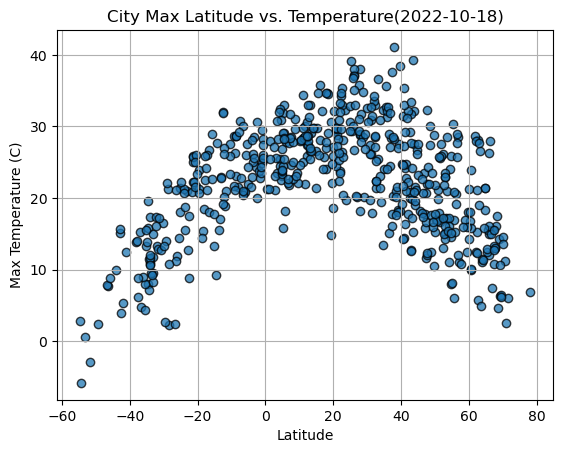

In [8]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df["Lat"]
y_values = city_data_df["Max Temp"]
plt.scatter(x_values,y_values, marker="o", facecolors="tab:blue", edgecolors="black", alpha=0.75)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("City Max Latitude vs. Temperature(2022-10-18)")
plt.grid()

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("C:/Users/tamik/Documents/Repositories/python-api-challenge/WeatherPy/output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

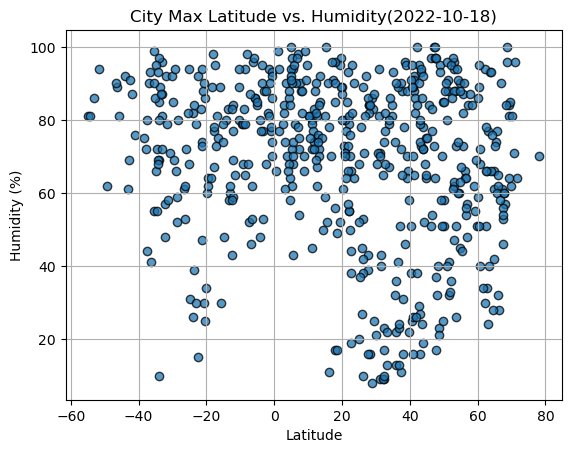

In [9]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df["Lat"]
y_values = city_data_df["Humidity"]
plt.scatter(x_values,y_values, marker="o", facecolors="tab:blue", edgecolors="black", alpha=0.75)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Max Latitude vs. Humidity(2022-10-18)")
plt.grid()

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("C:/Users/tamik/Documents/Repositories/python-api-challenge/WeatherPy/output_data//Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

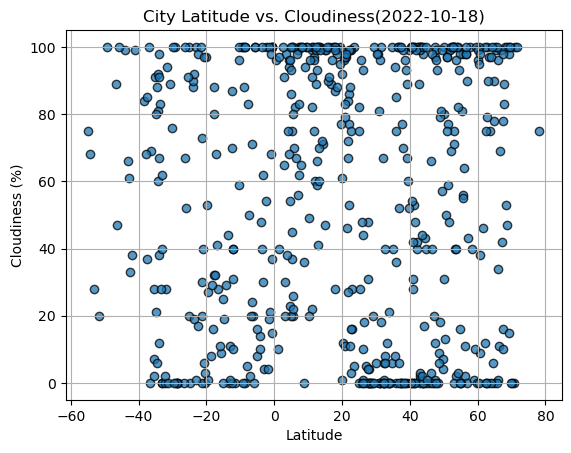

In [10]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df["Lat"]
y_values = city_data_df["Cloudiness"]
plt.scatter(x_values,y_values, marker="o", facecolors="tab:blue", edgecolors="black", alpha=0.75)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness(2022-10-18)")
plt.grid()

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("C:/Users/tamik/Documents/Repositories/python-api-challenge/WeatherPy/output_data//Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

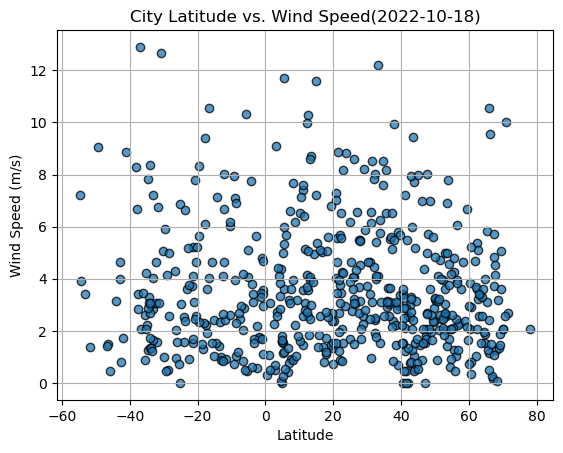

In [11]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df["Lat"]
y_values = city_data_df["Wind Speed"]
plt.scatter(x_values,y_values, marker="o", facecolors="tab:blue", edgecolors="black", alpha=0.75)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Latitude vs. Wind Speed(2022-10-18)")
plt.grid()

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("C:/Users/tamik/Documents/Repositories/python-api-challenge/WeatherPy/output_data//Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

In [12]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >=0), :]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,college,64.8569,-147.8028,21.44,61,90,1.54,US,1688968765
3,xucheng,20.3500,110.1288,32.14,61,12,2.37,CN,1688968766
5,vilyuchinsk,52.9306,158.4028,15.15,96,100,2.64,RU,1688968767
8,anadyr,64.7500,177.4833,18.28,42,0,4.00,RU,1688968202
11,yamada,39.4667,141.9500,27.62,66,60,2.97,JP,1688968610


In [13]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0), :]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,port-aux-francais,-49.3500,70.2167,2.36,62,100,9.05,TF,1688968765
2,invercargill,-46.4000,168.3500,7.76,89,47,1.49,NZ,1688968505
4,ushuaia,-54.8000,-68.3000,2.81,81,75,7.20,AR,1688968766
6,blackmans bay,-43.0167,147.3167,15.07,61,66,3.99,AU,1688968767
7,adamstown,-25.0660,-130.1015,21.37,68,100,6.87,PN,1688968767


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.34187219103864275


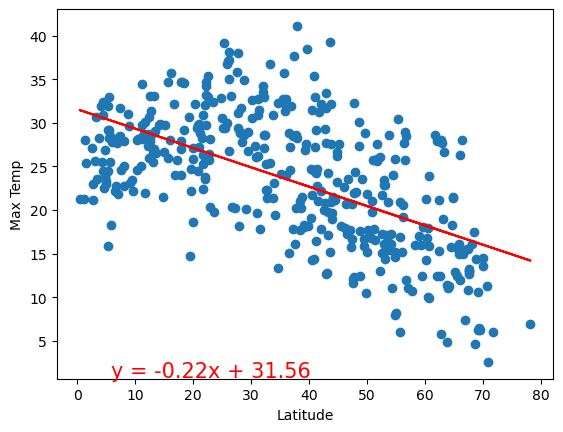

In [32]:
# Linear regression on Northern Hemisphere
correlation = st.pearsonr(northern_hemi_df.iloc[:,1],northern_hemi_df.iloc[:,1])

x_values = northern_hemi_df.iloc[:,1]
y_values = northern_hemi_df.iloc[:,3]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.savefig("C:/Users/tamik/Documents/Repositories/python-api-challenge/WeatherPy/output_data//Fig5.png")
print(f"The r-squared is: {rvalue**2}")
plt.show()


The r-squared is: 0.6616383487124019


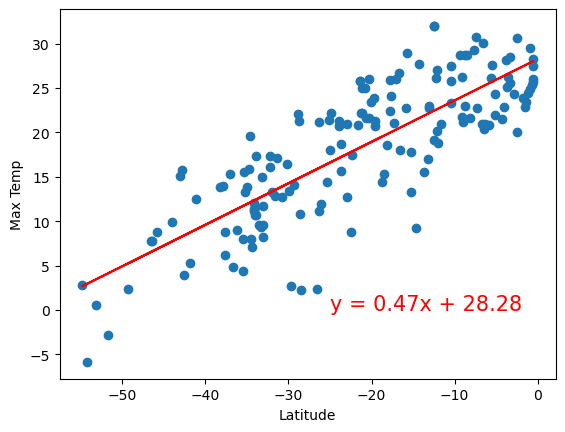

In [47]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df.iloc[:,1]
y_values = southern_hemi_df.iloc[:,3]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-25,0),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.savefig("C:/Users/tamik/Documents/Repositories/python-api-challenge/WeatherPy/output_data//Fig6.png")
print(f"The r-squared is: {rvalue**2}")
plt.show()

#There is a moderate positive relationship between max temperature and latitude #in the southern hemisphere. As latitude increases so does the trend of max #temperature as evidenced by the positive linear equation and positive slope of #the line. The r squared value of 0.6616 indicate the relationship is moderate #and the points follow the general trend of the line with few outliers. The #relationship between max temperature and latitude not as strong in the #northern hemisphere with a r value of 0.3419 indicating a weak correlation. #Here the relationship is negative as shown by the negative equation, the #general trend is that as latitude increases max temperature decreases, #opposite to the trend in the southern hemisphere. The values are more spread #out in the northern hemisphere graph further indicating the relationship is #weaker.

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.017905412739492126


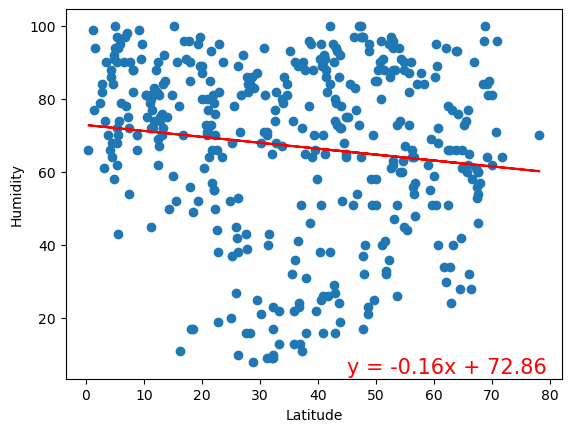

In [50]:
# Northern Hemisphere
x_values = northern_hemi_df.iloc[:,1]
y_values = northern_hemi_df.iloc[:,4]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.annotate(line_eq,(45,5),fontsize=15,color="red")
plt.savefig("C:/Users/tamik/Documents/Repositories/python-api-challenge/WeatherPy/output_data//Fig7.png")
print(f"The r-squared is: {rvalue**2}")
plt.show()


The r-squared is: 0.00020168724874224448


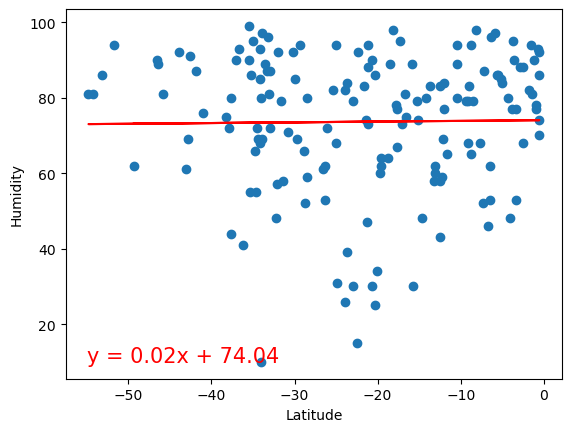

In [51]:
# Southern Hemisphere
x_values = southern_hemi_df.iloc[:,1]
y_values = southern_hemi_df.iloc[:,4]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.savefig("C:/Users/tamik/Documents/Repositories/python-api-challenge/WeatherPy/output_data//Fig8.png")
print(f"The r-squared is: {rvalue**2}")
plt.show()

#The relationship between humidity and latitude in the southern hemisphere is #the weakest in the weatherpy analysis with an r value of 0.0002 indicating #there is no relationship. This represented visually by the large spread of #values that do not follow any linear trend or grouping patterns. While the 
#equation of the line is positive the line appears almost horizontal further #showing there is no correlation. While the r value for the relationship #between humidity and latitude in the northern hemisphere is higher at 0.0179 #this value is still very far from zero showing there is extremely weak to no #relatiionship. More of the values are clustered in the top half of the graph #however they do not follow a linear trend of any kind which again shows little #to no relationship. While the equation for the line is negative indicating a #negative relationship the spread of values and the r value show there is no #relationship.

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.011925262835082048


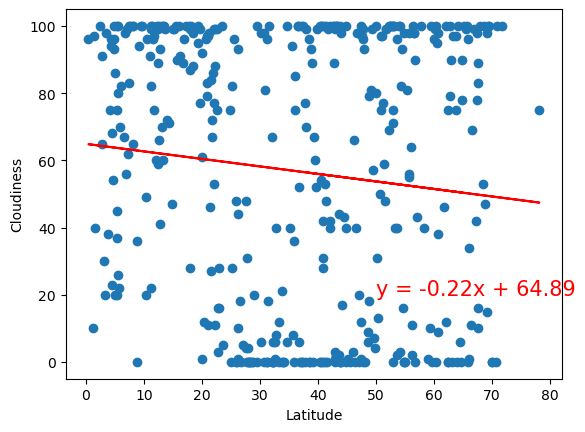

In [53]:
# Northern Hemisphere
x_values = northern_hemi_df.iloc[:,1]
y_values = northern_hemi_df.iloc[:,5]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.annotate(line_eq,(50,20),fontsize=15,color="red")
plt.savefig("C:/Users/tamik/Documents/Repositories/python-api-challenge/WeatherPy/output_data//Fig9.png")
print(f"The r-squared is: {rvalue**2}")
plt.show()


The r-squared is: 0.007052301867366258


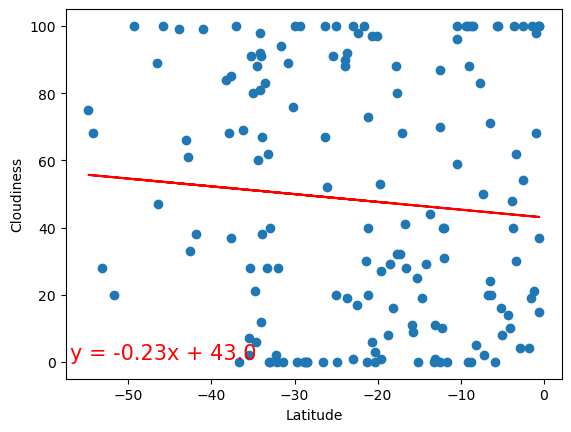

In [56]:
# Southern Hemisphere
x_values = southern_hemi_df.iloc[:,1]
y_values = southern_hemi_df.iloc[:,5]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-57,0.8),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.savefig("C:/Users/tamik/Documents/Repositories/python-api-challenge/WeatherPy/output_data//Fig10.png")
print(f"The r-squared is: {rvalue**2}")
plt.show()

#As shown by the large spread of the values on the graph, not follwing a linear #line of any sort,the relationship between cloudiness and latitude for both the #northern and southern hemisphere is very weak to non-existent. This is #reflected by their very low Pearsons’s correlation coefficient values of #0.0119 and 0.0071 respectively. While the equation for both the lines of best #fit are negative alluding to a negative relationship, 
#the lines are almost horizontal further indicating there is no correlation 
#between cloudiness and wind speed. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.01026281383496089


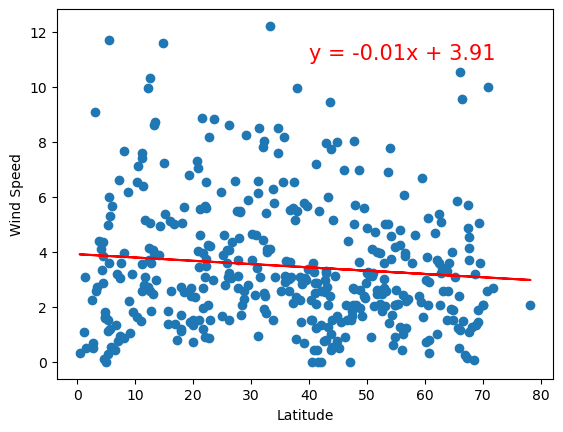

In [58]:
# Northern Hemisphere
x_values = northern_hemi_df.iloc[:,1]
y_values = northern_hemi_df.iloc[:,6]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.annotate(line_eq,(40,11),fontsize=15,color="red")
plt.savefig("C:/Users/tamik/Documents/Repositories/python-api-challenge/WeatherPy/output_data//Fig11.png")
print(f"The r-squared is: {rvalue**2}")
plt.show()


The r-squared is: 0.006359550723297693


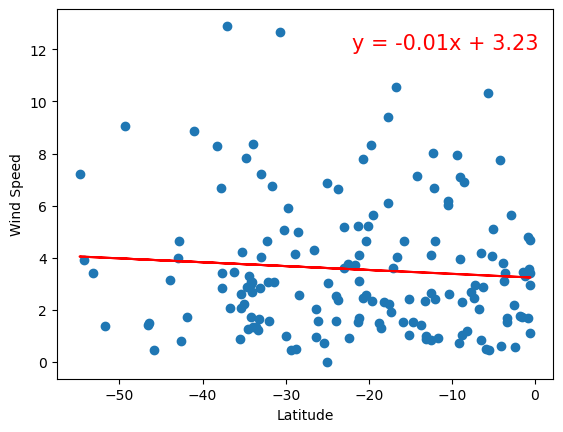

In [60]:
# Southern Hemisphere
x_values = southern_hemi_df.iloc[:,1]
y_values = southern_hemi_df.iloc[:,6]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-22,12),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.savefig("C:/Users/tamik/Documents/Repositories/python-api-challenge/WeatherPy/output_data//Fig12.png")
print(f"The r-squared is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [ ]:
#The relationship between wind speed and latitude for both the northern 
#and southern hemisphere is very weak to non-existent as reflected 
#by their very low Pearsons’s correlation coefficient values of 0.0103 and 
#0.0064 respectively. While the equation for both the lines of best fit 
#are negative alluding to a negative relationship, 
#the lines are almost horizontal further indicating there is no correlation 
#between latitude and wind speed. 